# Corner plots

Here we present and compare the results for four 3x2pt forecasting scenarios for the LSST survey.

The first scenario is the LSST SRD which is the current LSST forecast (for epochs Y1 and Y10).

The second scenario is the LSST forecast for Y1 and Y10 with evolving DE parameters $w_0$ and $w_a$.

The fiducial values of the cosmological parameters (except the DE parameters) are the same for all scenarios.

The fiducial values of the DE parameters are $w_0 = -1$ and $w_a = 0$ for the LSST SRD scenario
 while for the LSST forecast with evolving DE parameters they are $w_0 = -0.727$ and $w_a = -1.05$.

The values of th evolving DE parameters and their errors are taken from the DESI R1 results
 (see Table 3 in [DESI 2024 VI: Cosmological Constraints from the Measurements of BAO](https://arxiv.org/pdf/2404.03002) paper).



In [1]:
from getdist import plots
import numpy as np
import matplotlib.pyplot as plt
from getdist.gaussian_mixtures import GaussianND

In [2]:
labels = [r"\Omega_{m}", r"\sigma_{8}", r"n_s", r"w_{0}", r"w_{a}", r"\Omega_{b}", r"h"]
param_order = ["omega_m", "sigma_8", "n_s", "w_0", "w_a", "omega_b", "h"]
fiducial_values = {
    "lsst_desi": [0.3156, 0.831, 0.9645, -0.727, -1.05, 0.0491685, 0.6727],
    "lsst_srd": [0.3156, 0.831, 0.9645, -1, 0, 0.0491685, 0.6727]
}

fm_path = "fisher_matrices/"

fm_dict = {
    "lsst_desi":
        {
            "1": np.load(f"{fm_path}DESI+CMB+DESY5_y1_3x2pt_fisher_matrix_cosmo.npy"),
            "10": np.load(f"{fm_path}DESI+CMB+DESY5_y10_3x2pt_fisher_matrix_cosmo.npy")
        },
    "lsst_srd":
        {
            "1": np.load(f"{fm_path}srd_y1_3x2pt_fisher_matrix_cosmo.npy"),
            "10": np.load(f"{fm_path}srd_y10_3x2pt_fisher_matrix_cosmo.npy")
        }    
}

inv_fm_dict = {
    "lsst_desi":
        {
            "1": np.linalg.inv(fm_dict["lsst_desi"]["1"]),
            "10": np.linalg.inv(fm_dict["lsst_desi"]["10"])
        },
    "lsst_srd":
        {""
         "1": np.linalg.inv(fm_dict["lsst_srd"]["1"]),
         "10": np.linalg.inv(fm_dict["lsst_srd"]["10"])
         }
}
    
gauss_dict = {
    "lsst_desi":
        {
            "1": GaussianND(fiducial_values["lsst_desi"], inv_fm_dict["lsst_desi"]["1"], labels=labels, names=param_order),
            "10": GaussianND(fiducial_values["lsst_desi"], inv_fm_dict["lsst_desi"]["10"], labels=labels, names=param_order)
        },
    "lsst_srd":
        {
            "1": GaussianND(fiducial_values["lsst_srd"], inv_fm_dict["lsst_srd"]["1"], labels=labels, names=param_order),
            "10": GaussianND(fiducial_values["lsst_srd"], inv_fm_dict["lsst_srd"]["10"], labels=labels, names=param_order)
        }   
}


In [3]:
# Now we set up some GetDist plotting parameters
lw = 2.
g = plots.get_subplot_plotter(width_inch=12)
g.settings.alpha_filled_add = 0.5
g.settings.axes_labelsize = 20
g.settings.legend_rect_border = False
g.settings.axes_fontsize = 15
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 20
g.settings.linewidth_contour = lw
g.settings.linewidth = lw
g.settings.axis_marker_lw = 0.7
g.settings.legend_frac_subplot_margin = 0.1
plt.rcParams['axes.grid'] = False
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.figsize'] = (30, 30)

path = "plots_output/


CPU times: user 1min 25s, sys: 4.75 s, total: 1min 29s
Wall time: 30.4 s


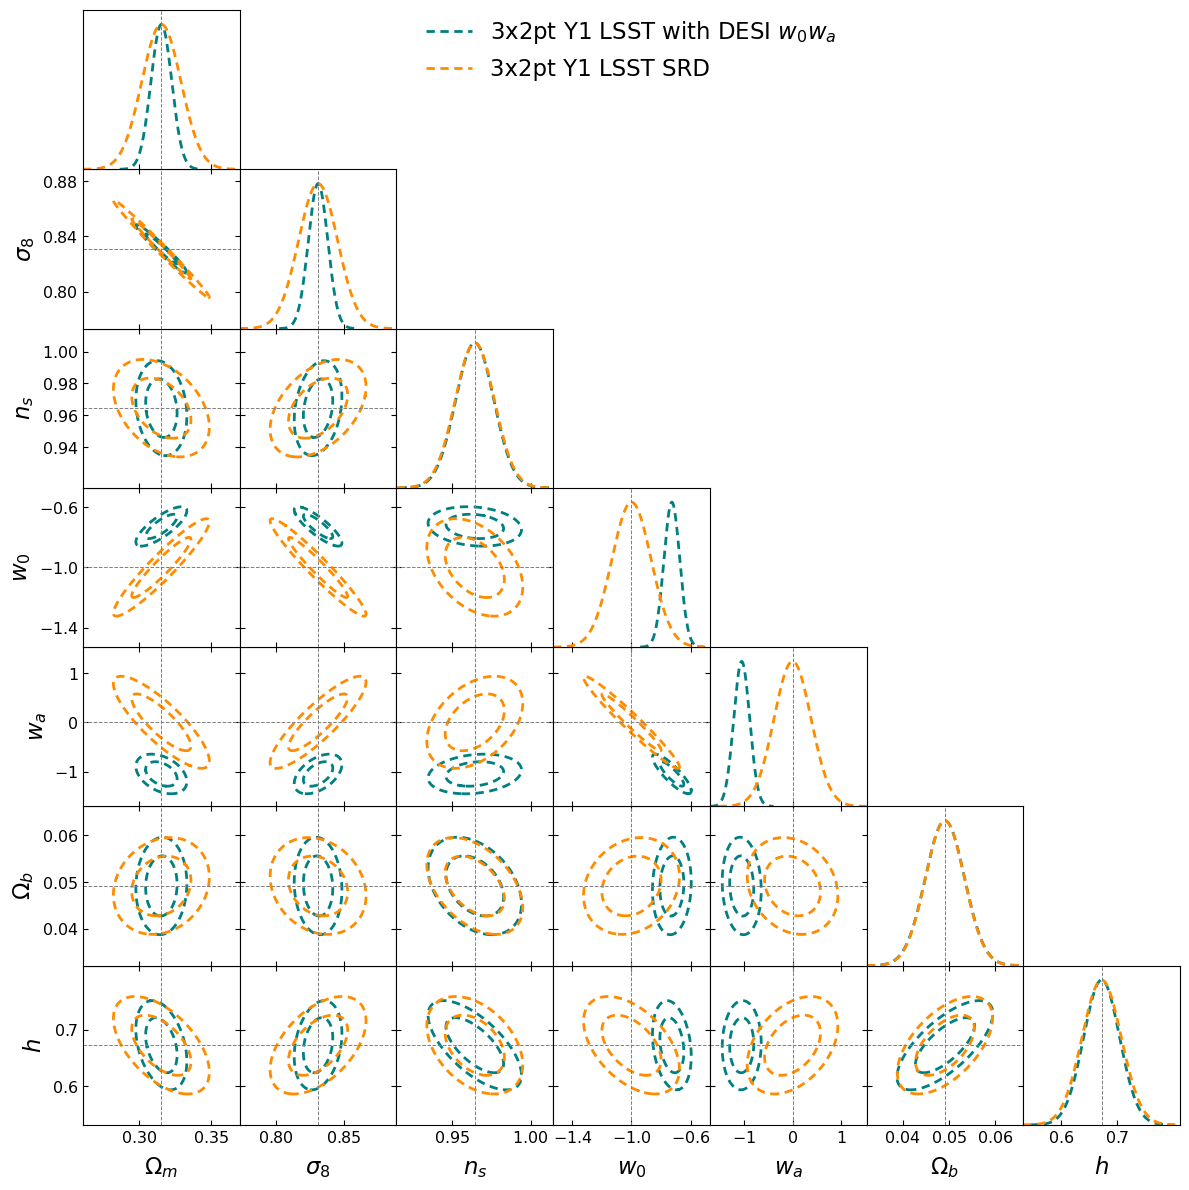

In [4]:
%%time

analysis = "3x2pt"
legend_labels = ["3x2pt Y1 LSST with DESI $w_0 w_a$",
                 "3x2pt Y1 LSST SRD"]
  
lower_kwargs = {'contour_colors': ["teal", "darkorange"],
                "filled":[False, False],
                "contour_ls":["--", "--", "-"],
                "contour_lws":[lw, lw, lw]}

lower_covmats = [gauss_dict["lsst_desi"]["1"],
                 gauss_dict["lsst_srd"]["1"],
                 ]

g.triangle_plot(lower_covmats,
                legend_labels=legend_labels,
                legend_ncol=1,
                markers=fiducial_values["lsst_srd"],
                **lower_kwargs)

# Save the figure
plt.savefig(f"{path}{analysis}_lsst_desi_comparison_y1.pdf", bbox_inches="tight")
plt.savefig(f"{path}{analysis}_lsst_desi_comparison_y1.png", bbox_inches="tight", dpi=300)


CPU times: user 1min 23s, sys: 4.64 s, total: 1min 28s
Wall time: 30.1 s


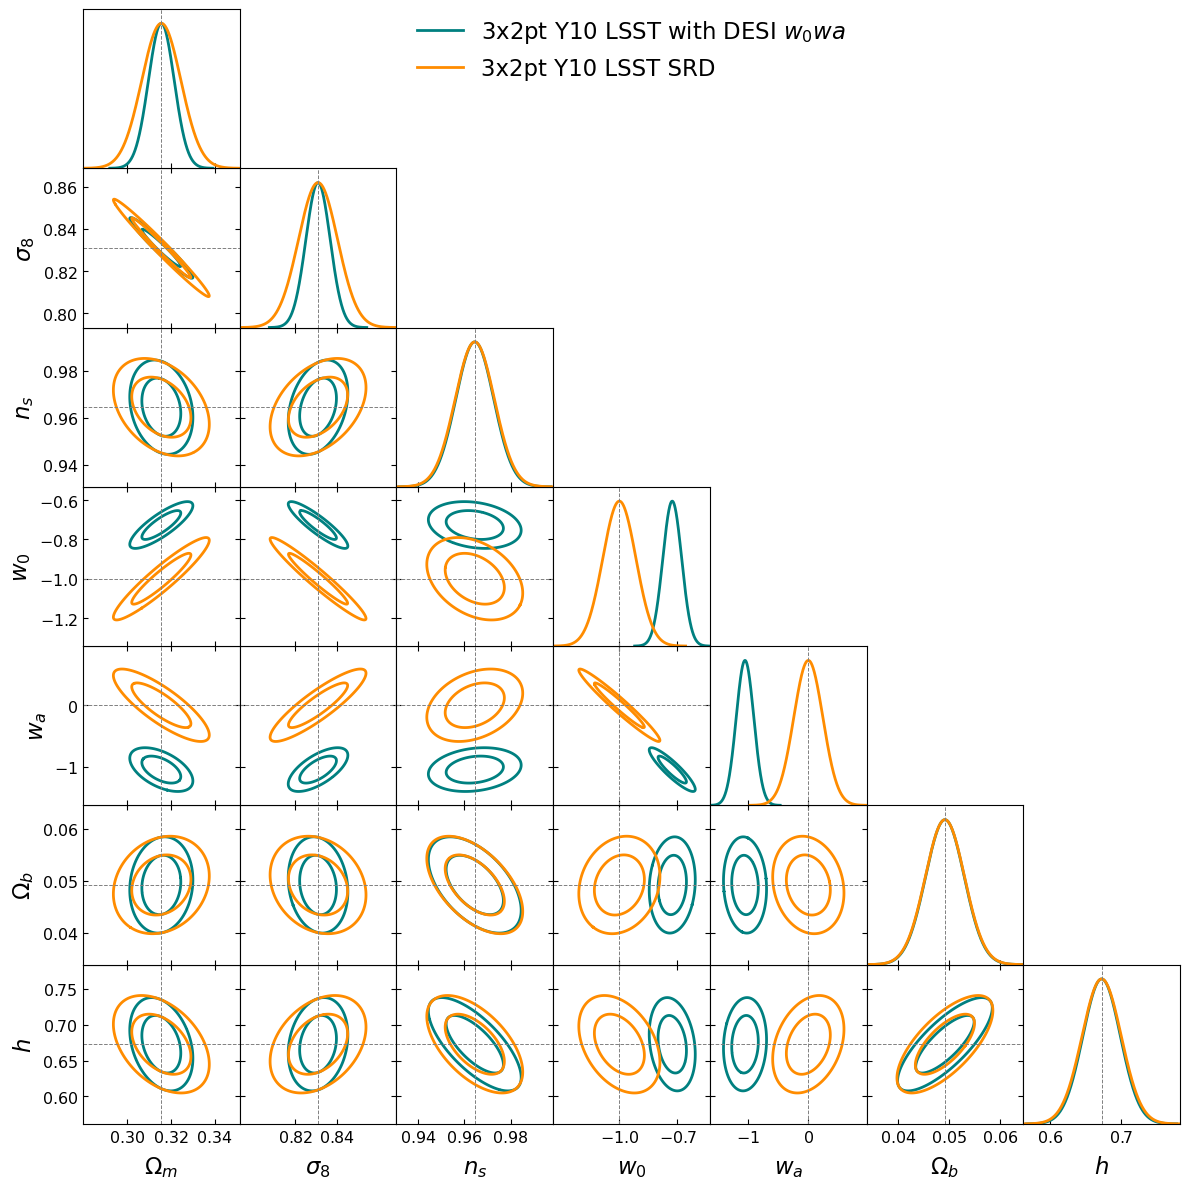

In [5]:
%%time

legend_labels = ["3x2pt Y10 LSST with DESI $w_0 wa$",
                 "3x2pt Y10 LSST SRD"]
  
lower_kwargs = {'contour_colors': ["teal", "darkorange"],
                "filled":[False, False],
                "contour_ls":["-", "-", "-"],
                "contour_lws":[lw, lw, lw]}

lower_covmats = [gauss_dict["lsst_desi"]["10"],
                 gauss_dict["lsst_srd"]["10"],
                 ]

g.triangle_plot(lower_covmats,
                legend_labels=legend_labels,
                legend_ncol=1,
                markers=fiducial_values["lsst_srd"],
                **lower_kwargs)

# Save the figure
plt.savefig(f"{path}{analysis}_lsst_desi_comparison_y10.pdf", bbox_inches="tight")
plt.savefig(f"{path}{analysis}_lsst_desi_comparison_y10.png", bbox_inches="tight", dpi=300)


CPU times: user 2min 18s, sys: 10.4 s, total: 2min 29s
Wall time: 44.9 s


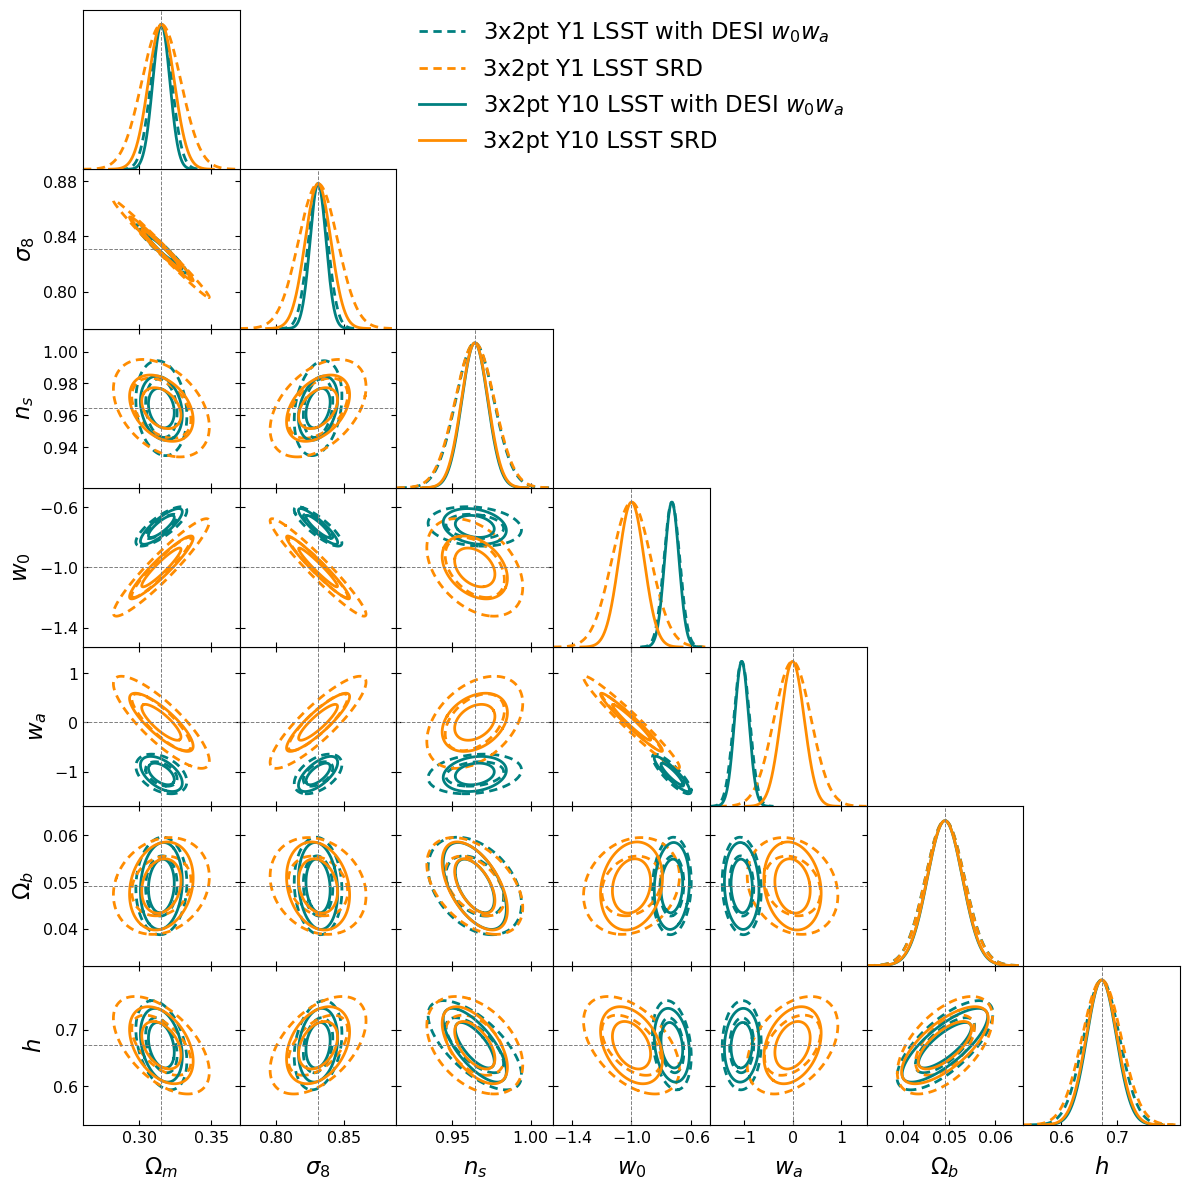

In [6]:
%%time

legend_labels = ["3x2pt Y1 LSST with DESI $w_0 w_a$",
                 "3x2pt Y1 LSST SRD",
                 "3x2pt Y10 LSST with DESI $w_0 w_a$",
                 "3x2pt Y10 LSST SRD"]
  
lower_kwargs = {'contour_colors': ["teal", "darkorange", "teal", "darkorange"],
                "filled":[False, False, False, False],
                "contour_ls":["--", "--", "-", "-"],
                "contour_lws":[lw, lw, lw, lw]}

lower_covmats = [gauss_dict["lsst_desi"]["1"],
                 gauss_dict["lsst_srd"]["1"],
                 gauss_dict["lsst_desi"]["10"],
                 gauss_dict["lsst_srd"]["10"],
                 ]

g.triangle_plot(lower_covmats,
                legend_labels=legend_labels,
                legend_ncol=1,
                markers=fiducial_values["lsst_srd"],
                **lower_kwargs)

# Save the figure
plt.savefig(f"{path}{analysis}_lsst_desi_comparison_y1y10.pdf", bbox_inches="tight")
plt.savefig(f"{path}{analysis}_lsst_desi_comparison_y1y10.png", bbox_inches="tight", dpi=300)


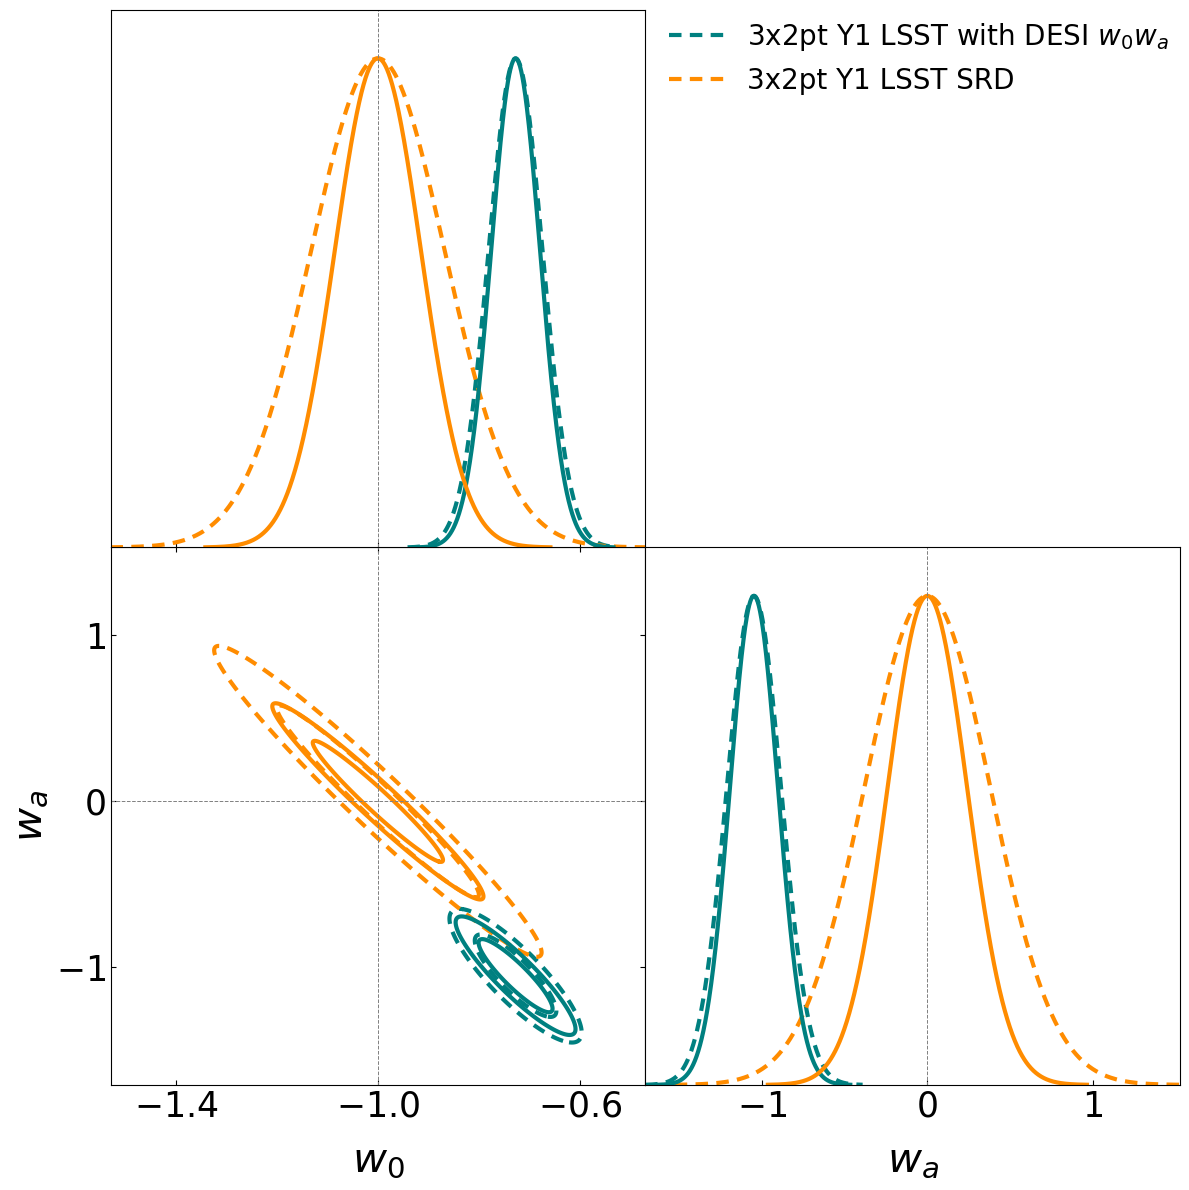

In [7]:
# Filter indices for w_0 and w_a
param_indices = [3, 4]  # Indices of w_0 and w_a in your lists
labels_filtered = [labels[i] for i in param_indices]
param_order_filtered = [param_order[i] for i in param_indices]

# Filtered fiducial values
fiducial_values_filtered = {
    "lsst_desi": [fiducial_values["lsst_desi"][i] for i in param_indices],
    "lsst_srd": [fiducial_values["lsst_srd"][i] for i in param_indices]
}

# Filtered inverse Fisher matrix entries
inv_fm_dict_filtered = {
    "lsst_desi": {
        "1": inv_fm_dict["lsst_desi"]["1"][np.ix_(param_indices, param_indices)],
        "10": inv_fm_dict["lsst_desi"]["10"][np.ix_(param_indices, param_indices)]
    },
    "lsst_srd": {
        "1": inv_fm_dict["lsst_srd"]["1"][np.ix_(param_indices, param_indices)],
        "10": inv_fm_dict["lsst_srd"]["10"][np.ix_(param_indices, param_indices)]
    }
}

# Construct GaussianND objects for the filtered parameters
gauss_dict_filtered = {
    "lsst_desi": {
        "1": GaussianND(fiducial_values_filtered["lsst_desi"], inv_fm_dict_filtered["lsst_desi"]["1"], labels=labels_filtered, names=param_order_filtered),
        "10": GaussianND(fiducial_values_filtered["lsst_desi"], inv_fm_dict_filtered["lsst_desi"]["10"], labels=labels_filtered, names=param_order_filtered)
    },
    "lsst_srd": {
        "1": GaussianND(fiducial_values_filtered["lsst_srd"], inv_fm_dict_filtered["lsst_srd"]["1"], labels=labels_filtered, names=param_order_filtered),
        "10": GaussianND(fiducial_values_filtered["lsst_srd"], inv_fm_dict_filtered["lsst_srd"]["10"], labels=labels_filtered, names=param_order_filtered)
    }
}

g.settings.axes_labelsize = 30
g.settings.legend_rect_border = False
g.settings.axes_fontsize = 25

legend_labels = ["3x2pt Y1 LSST with DESI $w_0 w_a$",
                 "3x2pt Y1 LSST SRD"]

lower_kwargs = {'contour_colors': ["teal", "darkorange", "teal", "darkorange"],
                "filled":[False, False, False, False],
                "contour_ls":["--", "--", "-", "-"],
                "contour_lws":[3, 3, 3, 3]}  

# List of GaussianND objects for the filtered parameters
lower_covmats = [gauss_dict_filtered["lsst_desi"]["1"],
                 gauss_dict_filtered["lsst_srd"]["1"],
                 gauss_dict_filtered["lsst_desi"]["10"],
                 gauss_dict_filtered["lsst_srd"]["10"],
                 ]

g.triangle_plot(lower_covmats,
                legend_labels=legend_labels,
                legend_ncol=1,
                markers=fiducial_values_filtered["lsst_srd"],
                **lower_kwargs)

# Save the figure
plt.savefig(f"{path}{analysis}_lsst_desi_comparison_y1y10_w0wa.pdf", bbox_inches="tight")
plt.savefig(f"{path}{analysis}_lsst_desi_comparison_y1y10_w0wa.png", bbox_inches="tight", dpi=300)

plt.show()


In [8]:
def get_sigmas(fisher_matrix):
    return np.sqrt(np.diag(fisher_matrix))

def get_diff_sigmas(fisher_matrix1, fisher_matrix2):
    return np.absolute(np.sqrt(np.diag(fisher_matrix1)) - np.sqrt(np.diag(fisher_matrix2)))

sigmas_dict = {
    "lsst_desi":
        {
            "1": get_sigmas(fm_dict["lsst_desi"]["1"]),
            "10": get_sigmas(fm_dict["lsst_desi"]["10"])
        },
    "lsst_srd":
        {
            "1": get_sigmas(fm_dict["lsst_srd"]["1"]),
            "10": get_sigmas(fm_dict["lsst_srd"]["10"])
        }   
}

sigmas_diff_dict = {
    "1": get_diff_sigmas(fm_dict["lsst_srd"]["1"], fm_dict["lsst_desi"]["1"]),
    "10": get_diff_sigmas(fm_dict["lsst_srd"]["10"], fm_dict["lsst_desi"]["10"])    
}


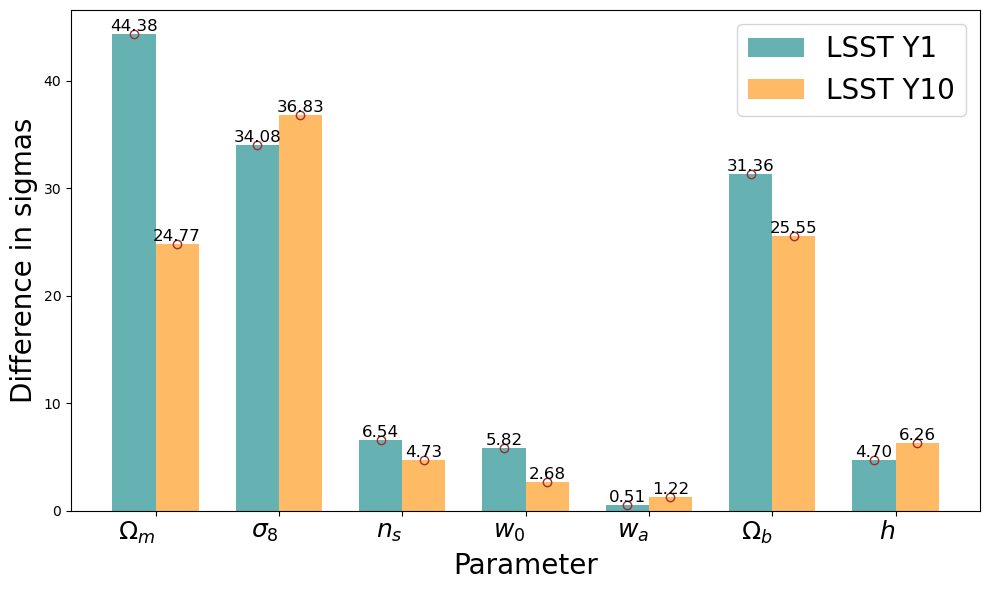

In [9]:
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(param_order))

bars_y1 = plt.bar(index - bar_width/2,
                  sigmas_diff_dict["1"],
                  bar_width, 
                  color="teal", 
                  alpha=0.6, 
                  label="LSST Y1")
bars_y10 = plt.bar(index + bar_width/2, 
                   sigmas_diff_dict["10"],
                   bar_width, 
                   color="darkorange",
                   alpha=0.6,
                   label="LSST Y10")

# Set the labels for the x-axis
bar_labels = [r"$\Omega_{m}$", r"$\sigma_{8}$", r"$n_{s}$", r"$w_{0}$", r"$w_{a}$", r"$\Omega_{b}$", r"$h$"]
plt.xticks(ticks=index, labels=bar_labels, rotation=0, ha='right', fontsize=18)

plt.xlabel("Parameter", fontsize=20)
plt.ylabel("Difference in sigmas", fontsize=20)
plt.legend(fontsize=20)

# Add circles to indicate sigma values on the bars
for bars, sigmas in [(bars_y1, sigmas_diff_dict["1"]), (bars_y10, sigmas_diff_dict["10"])]:
    for bar, sigma in zip(bars, sigmas):
        height = bar.get_height()
        plt.plot(bar.get_x() + bar.get_width() / 2, height, 'o', 
                 markerfacecolor='none', markeredgecolor='brown')
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{sigma:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()

plt.savefig(f"{path}sigmas_diff.pdf", bbox_inches="tight")
plt.savefig(f"{path}sigmas_diff.png", bbox_inches="tight")

plt.show()
